In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [39]:
infile1 = 'basic_2015emis_mon_201910-202009_GEM.nc'
infile2 = 'basic_v2_mon_2015_GEM.nc'
# infile3 = 'basic_v2_meanmnth_201511_nest1.nc'
infile4 = 'basic_v2_mon_2015_nest1.nc'
infile5 = 'basic_2015emis_meanmnth_202001_nest1.nc'
infile6 = 'basic_2015emis_meanmnth_202001_nest1_temp.nc'
infile7 = 'basic_v2_meanmnth_201501_nest1.nc'
infile8 = 'basic_v2_meanmnth_201501_nest1_temp.nc'
ds1 = xr.open_dataset(infile1)
ds2 = xr.open_dataset(infile2)
# ds3 = xr.open_dataset(infile3)
ds4 = xr.open_dataset(infile4)
ds5 = xr.open_dataset(infile5)
ds6 = xr.open_dataset(infile6)
ds7 = xr.open_dataset(infile7)
ds8 = xr.open_dataset(infile8)

In [40]:
ds = ds7
ds

<xarray.Dataset>
Dimensions:    (time: 1, x: 150, y: 150, z: 29)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * x          (x) int64 0 1 2 3 4 5 6 7 8 ... 142 143 144 145 146 147 148 149
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 142 143 144 145 146 147 148 149
  * z          (z) int64 0 1 2 3 4 5 6 7 8 9 ... 19 20 21 22 23 24 25 26 27 28
Data variables:
    lat        (x, y) float64 ...
    lon        (x, y) float64 ...
    GEM_ngm-3  (time, x, y, z) float64 ...
    GOM_ngm-3  (time, x, y, z) float64 ...
    PBM_ngm-3  (time, x, y, z) float64 ...

In [46]:
species = 'PBM_ngm-3'
da = ds[species].mean(dim='time')
lat, lon = ds['lat'].values, ds['lon'].values
da.mean(),da.min(),da.max()

(<xarray.DataArray 'PBM_ngm-3' ()>
 array(0.05108918),
 <xarray.DataArray 'PBM_ngm-3' ()>
 array(1.79400746e-06),
 <xarray.DataArray 'PBM_ngm-3' ()>
 array(1.84965632))

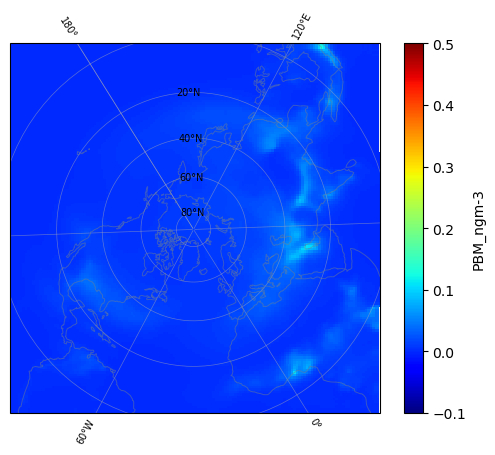

In [47]:
# plot the first layer
pdata = da.isel(z=0).values

# This is the map projection we want to plot *onto*
map_proj = ccrs.NorthPolarStereo(central_longitude=-32)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-32)})
ax.coastlines(color='slategray',zorder=2,alpha=0.5,linewidth=0.7)
gl = ax.gridlines(draw_labels=True,zorder=1,alpha=0.5,linewidth=0.5,crs=ccrs.PlateCarree())
gl.xlabel_style = {'size':7}
gl.ylabel_style = {'size':7}

cmap = plt.get_cmap('jet')
cmap.set_bad ('w',1.0)

im = ax.pcolormesh(lon, lat, pdata, cmap=cmap,
    vmin=-0.1,vmax=0.5,
    transform=ccrs.PlateCarree(),
    zorder=0)

plt.colorbar(im, ax=ax, orientation='vertical',label=species)
plt.show()